# Alignment of temperature series of GB1 protein using WNetAlign

In [1]:
# !pip install numpy pandas sklearn scipy matplotlib seaborn

In [1]:
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nmr.load_spectra import load_spectra
from nmr.align import align_pair, save_alignment
from nmr.postprocess import compute_distance_between_aligned, postprocess_chain_results
from nmr.nmr_plots import plot_temperatures

In [3]:
FIG_PATH = "Figures"

In [4]:
DATA_PATH = "2D/15N_HSQC_GB1_reduced"

In [5]:
max_peak_fraction=0.1
max_distance = 0.05
trash_cost = 0.09

RES_PATH = f"2D/Alignment_results/max_peak_fraction/Results_{max_peak_fraction}_{max_distance}_{trash_cost}_auto"

## Data distribution

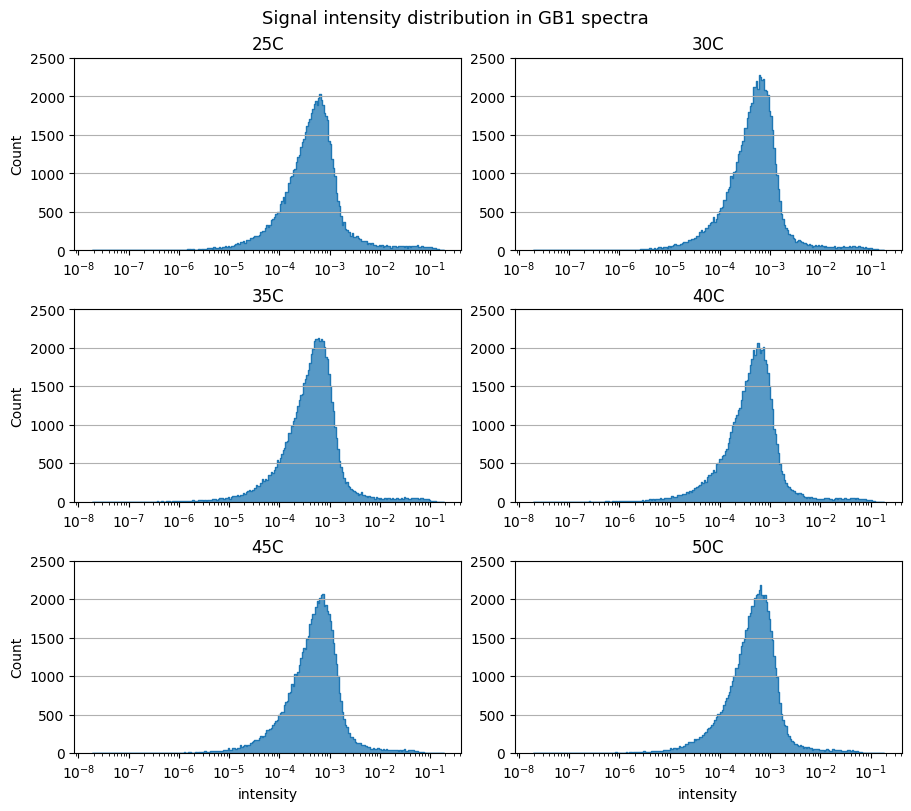

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(9, 8), constrained_layout=True, squeeze=False, dpi=100)

for i, path in enumerate(sorted(glob(DATA_PATH + "/*.csv"))):
    label = path.split("/")[-1].split(".")[0][-3:]
    df = pd.read_csv(path)
    if i == 0:
        shared_bins = np.histogram_bin_edges(np.log10(df['i']), bins='auto')
    sns.histplot(data=df, 
                 x='i',
                 ax = axes[i//2, i%2],
                 log_scale=True,
                 bins=shared_bins,
                 element="step",
                )
    axes[i//2, i%2].grid(axis='y')
    axes[i//2, i%2].set(title=f"{label}")
    axes[i//2, i%2].set_ylim(0, 2500)
    if i%2 == 1: axes[i//2, i%2].set_ylabel("")
    if i//2 == 2: axes[i//2, i%2].set_xlabel('intensity')
    else: axes[i//2, i%2].set_xlabel('')

plt.suptitle("Signal intensity distribution in GB1 spectra", fontsize=13)
plt.savefig(f"{FIG_PATH}/Signal_distribution_GB1.png")
plt.show()

## Plot

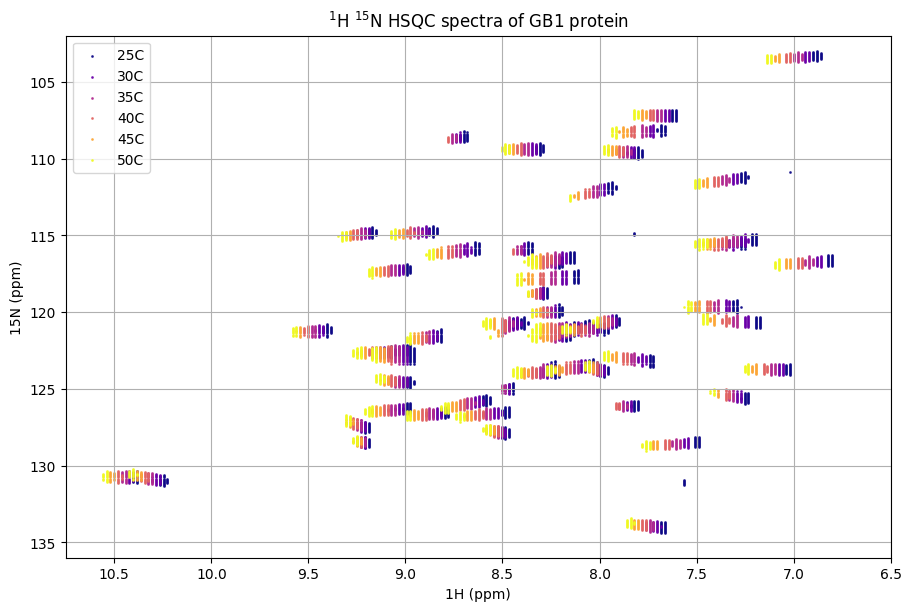

In [7]:
plot_temperatures(data_path=DATA_PATH, 
                  max_peak_fraction=max_peak_fraction, 
                  intensity_threshold=None,
                  cmap_name="plasma", 
                  figsize=(9,6), 
                  dpi=100,
                  alpha=0.8,
                  s=1,
                  hlim = (6.5, 10.75), # (6, 11)
                  nlim = (102, 136), # (100, 136)
                 )
plt.title('$^1$H $^{15}$N HSQC spectra of GB1 protein')
plt.show()

## Alignments 

Paiwise alignmensts of temperature series.

Will be used for the chain alignments

In [8]:
max_peak_fraction=0.1

spectra = load_spectra(DATA_PATH, 
                       dim=2, 
                       scale_nucl={'15N':10},
                       max_peak_fraction=max_peak_fraction,
                       verbose=True,
                      )

25C
number of peaks: 68473, total signal: 134.45
Peaks with intensities higher than max_intensity * 0.1
number of peaks: 1431, max_intensity * max_peak_fraction: 0.019, % of signal left: 60.62

30C
number of peaks: 73084, total signal: 120.11
Peaks with intensities higher than max_intensity * 0.1
number of peaks: 1326, max_intensity * max_peak_fraction: 0.016, % of signal left: 55.89

35C
number of peaks: 70411, total signal: 106.78
Peaks with intensities higher than max_intensity * 0.1
number of peaks: 1308, max_intensity * max_peak_fraction: 0.014, % of signal left: 55.8

40C
number of peaks: 66817, total signal: 94.77
Peaks with intensities higher than max_intensity * 0.1
number of peaks: 1089, max_intensity * max_peak_fraction: 0.015, % of signal left: 52.81

45C
number of peaks: 68240, total signal: 81.18
Peaks with intensities higher than max_intensity * 0.1
number of peaks: 927, max_intensity * max_peak_fraction: 0.013, % of signal left: 37.06

50C
number of peaks: 69883, total 

In [9]:
for i in range(len(spectra)-1):
    s1, s2 = spectra[i:i+2]

    s, r = align_pair(s1,
                      s2,
                      max_distance = max_distance,
                      trash_cost = trash_cost,
                      normalize = True,
                     )
    save_alignment(r, s1, s2, scale_nucl={'15N':10}, nuclei=['15N', '1H'], OUT_FOLDER=RES_PATH)

    

## Chain alignment

In [10]:
df_chain = postprocess_chain_results(RES_PATH, separate=False)
df_chain

,25C_15N,25C_1H,25C,30C,35C,40C,45C,50C
0,103.037,6.88056,"(103.037, 6.88056)","(103.037, 6.9197)",NaN,NaN,NaN,NaN
1,103.037,6.90013,"(103.037, 6.90013)","(103.037, 6.93927)","(103.037, 6.9784)",NaN,NaN,NaN
2,103.105,6.88056,"(103.105, 6.88056)","(103.105, 6.9197)",NaN,NaN,NaN,NaN
3,103.105,6.90013,"(103.105, 6.90013)","(103.105, 6.93927)","(103.105, 6.9784)","(103.105, 7.01754)",NaN,NaN
4,103.172,6.88056,"(103.172, 6.88056)","(103.172, 6.9197)","(103.172, 6.95884)",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1242,134.281,7.68286,"(134.281, 7.68286)","(134.214, 7.72199)","(134.214, 7.76113)","(134.214, 7.76113)","(134.146, 7.80026)","(134.079, 7.8394)"
1243,134.349,7.66329,"(134.349, 7.66329)","(134.281, 7.70242)","(134.214, 7.74156)","(134.146, 7.7807)","(134.079, 7.81983)","(134.011, 7.85897)"
1244,134.349,7.68286,"(134.349, 7.68286)","(134.281, 7.72199)","(134.281, 7.74156)","(134.214, 7.7807)","(134.146, 7.81983)","(134.079, 7.8394)"
1245,134.416,7.66329,"(134.416, 7.66329)","(134.281, 7.70242)","(134.214, 7.74156)","(134.146, 7.7807)","(134.079, 7.81983)","(134.011, 7.85897)"


## Compute distances between aligned signals - chain alignment

In [11]:
df_dist = compute_distance_between_aligned(RES_PATH)
df_dist

,25C,30C,25C vs 30C distance,25C vs 30C shift in 15N,25C vs 30C shift in 1H,35C,30C vs 35C distance,30C vs 35C shift in 15N,30C vs 35C shift in 1H,40C,...,35C vs 40C shift in 15N,35C vs 40C shift in 1H,45C,40C vs 45C distance,40C vs 45C shift in 15N,40C vs 45C shift in 1H,50C,45C vs 50C distance,45C vs 50C shift in 15N,45C vs 50C shift in 1H
0,"(103.037, 6.88056)","(103.037, 6.9197)",0.039140,0.000,0.03914,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(103.037, 6.90013)","(103.037, 6.93927)",0.039140,0.000,0.03914,"(103.037, 6.9784)",0.039130,0.000,0.03913,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(103.105, 6.88056)","(103.105, 6.9197)",0.039140,0.000,0.03914,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(103.105, 6.90013)","(103.105, 6.93927)",0.039140,0.000,0.03914,"(103.105, 6.9784)",0.039130,0.000,0.03913,"(103.105, 7.01754)",...,0.000,0.03914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(103.172, 6.88056)","(103.172, 6.9197)",0.039140,0.000,0.03914,"(103.172, 6.95884)",0.039140,0.000,0.03914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,"(134.281, 7.68286)","(134.214, 7.72199)",0.077590,-0.067,0.03913,"(134.214, 7.76113)",0.039140,0.000,0.03914,"(134.214, 7.76113)",...,0.000,0.00000,"(134.146, 7.80026)",0.078455,-0.068,0.03913,"(134.079, 7.8394)",0.077595,-0.067,0.03914
1243,"(134.349, 7.66329)","(134.281, 7.70242)",0.078455,-0.068,0.03913,"(134.214, 7.74156)",0.077595,-0.067,0.03914,"(134.146, 7.7807)",...,-0.068,0.03914,"(134.079, 7.81983)",0.077590,-0.067,0.03913,"(134.011, 7.85897)",0.078460,-0.068,0.03914
1244,"(134.349, 7.68286)","(134.281, 7.72199)",0.078455,-0.068,0.03913,"(134.281, 7.74156)",0.019570,0.000,0.01957,"(134.214, 7.7807)",...,-0.067,0.03914,"(134.146, 7.81983)",0.078455,-0.068,0.03913,"(134.079, 7.8394)",0.069800,-0.067,0.01957
1245,"(134.416, 7.66329)","(134.281, 7.70242)",0.140557,-0.135,0.03913,"(134.214, 7.74156)",0.077595,-0.067,0.03914,"(134.146, 7.7807)",...,-0.068,0.03914,"(134.079, 7.81983)",0.077590,-0.067,0.03913,"(134.011, 7.85897)",0.078460,-0.068,0.03914


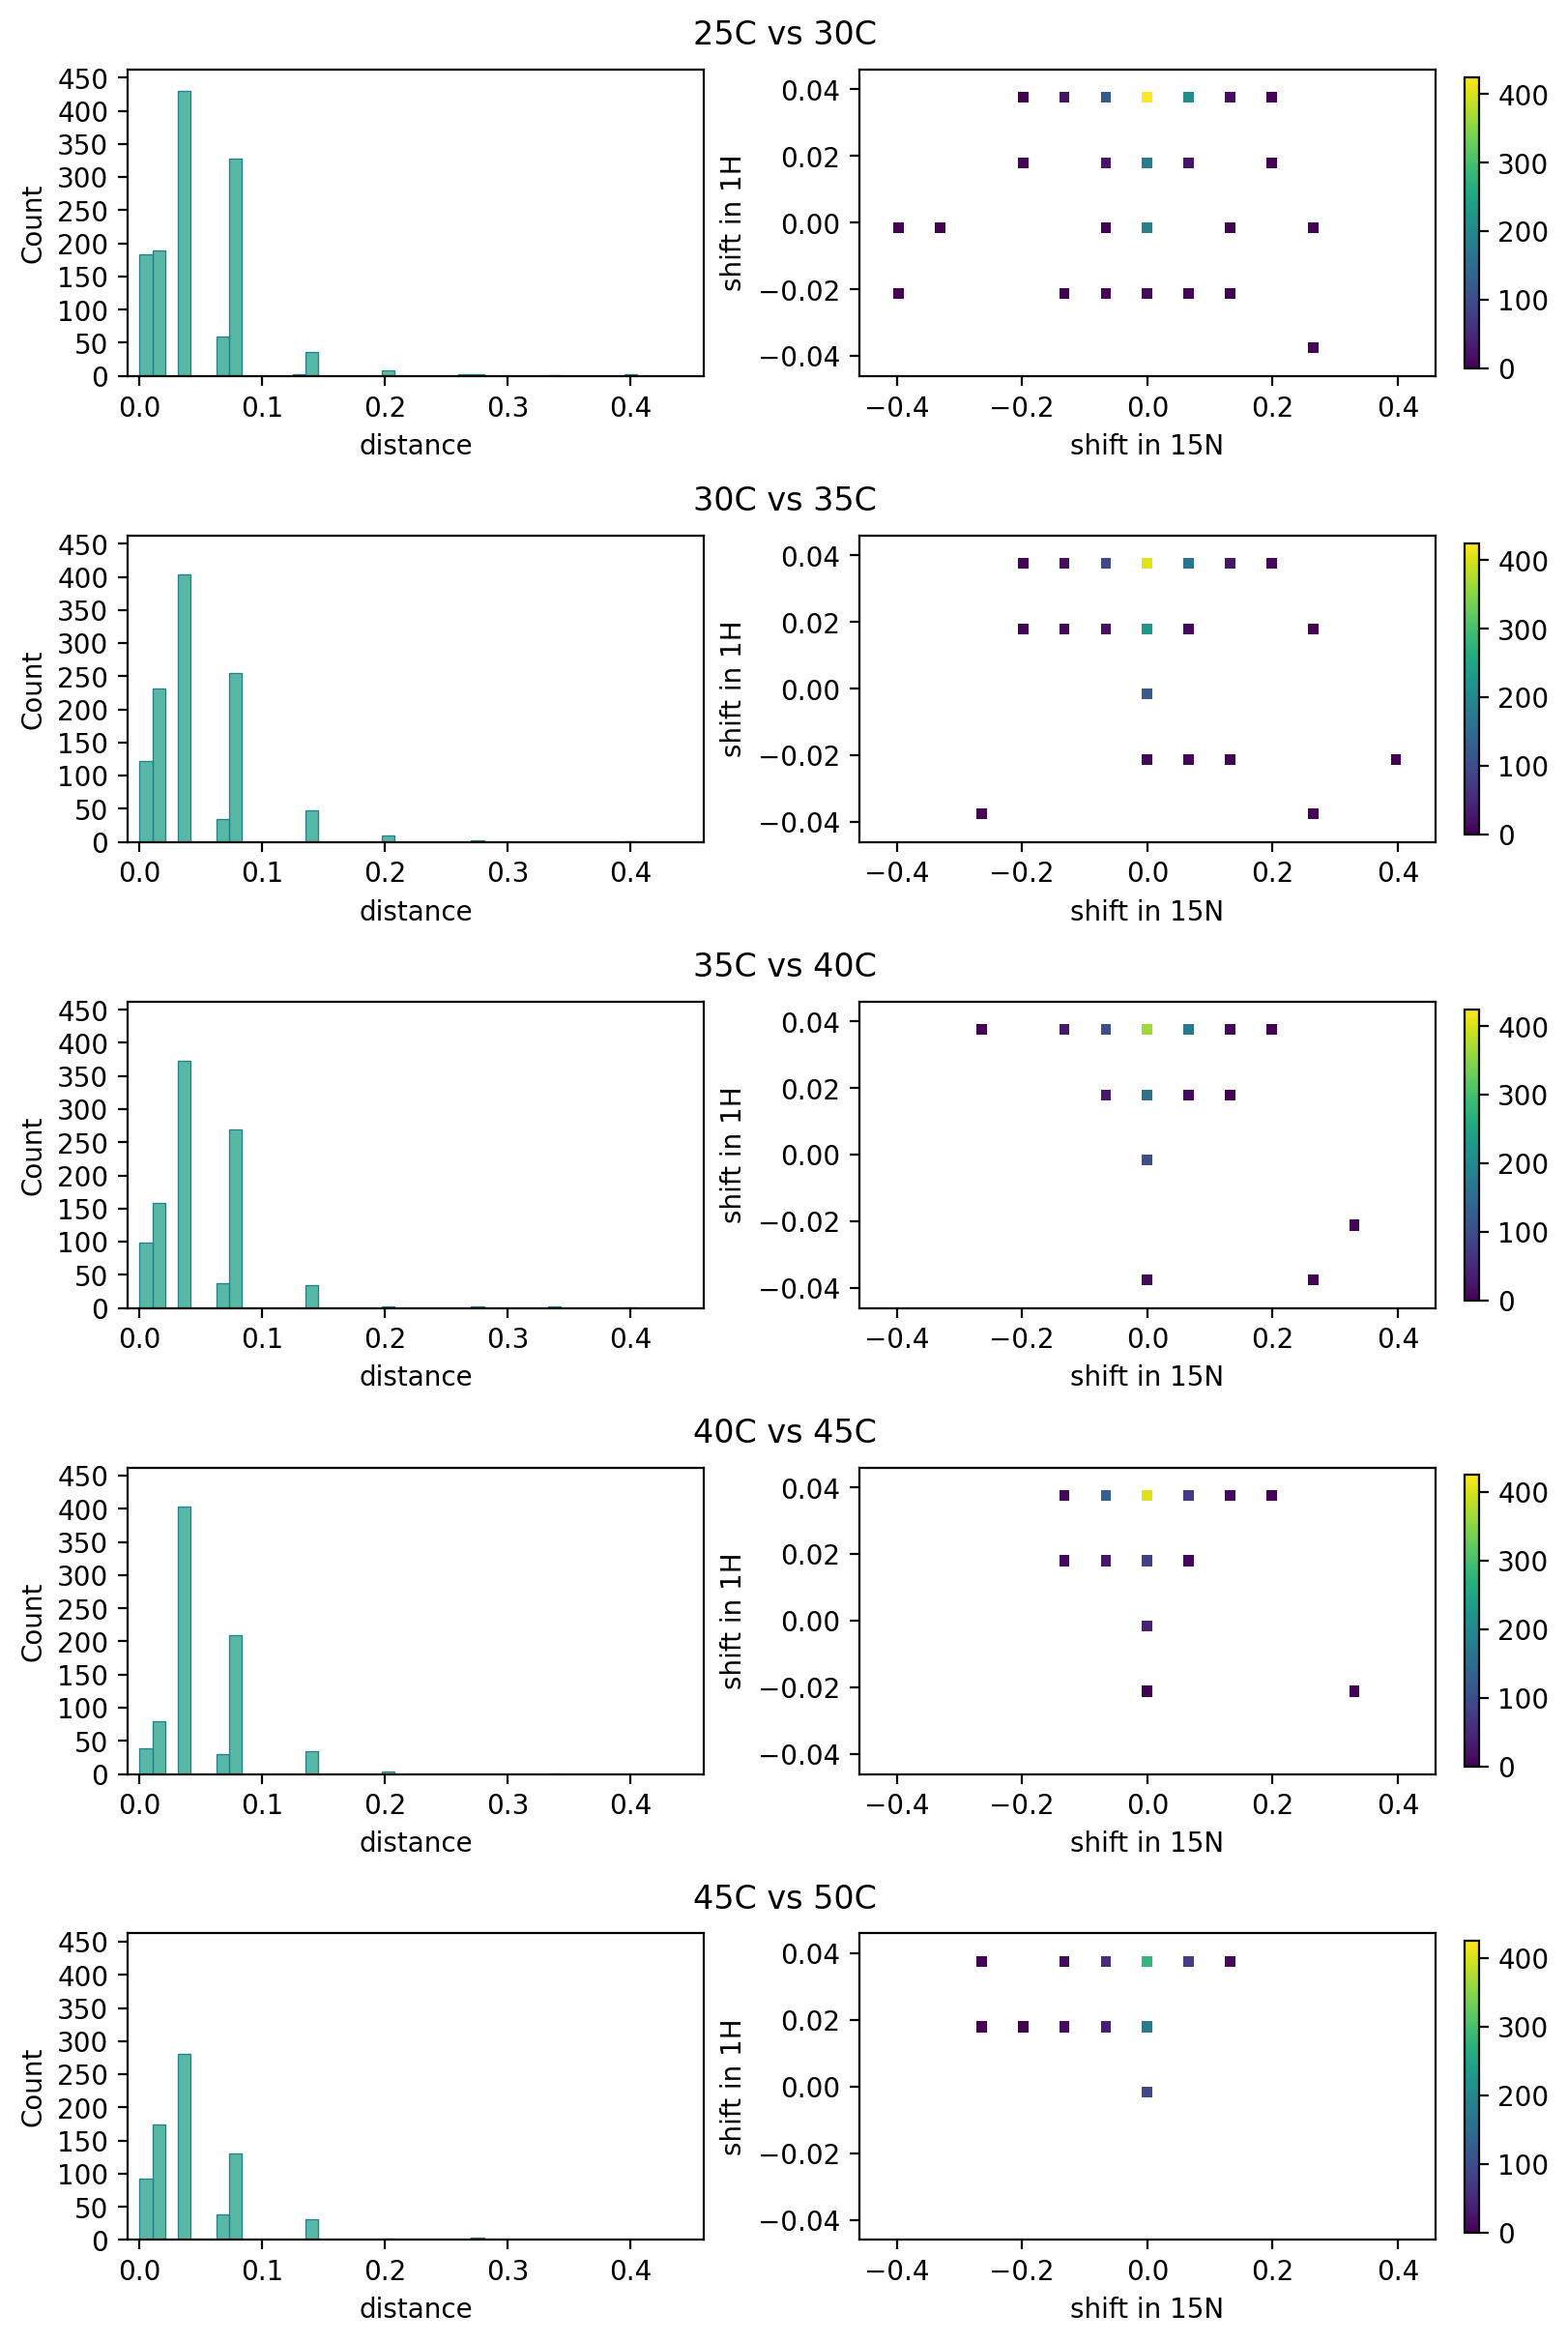

In [12]:
temps = [(25, 30), (30, 35), (35, 40), (40, 45), (45, 50)]
dists = ['distance', ('shift in 1H', 'shift in 15N')]
nrows = len(temps)
ncols = len(dists)

shared_bins = {d: np.linspace(
            df_dist[np.isfinite(df_dist[f'{25}C vs {30}C {d}'])][f'{25}C vs {30}C {d}'].min().round(5),
            df_dist[np.isfinite(df_dist[f'{25}C vs {30}C {d}'])][f'{25}C vs {30}C {d}'].max().round(5),
            num=n)
               for d, n in zip(['distance', 'shift in 1H', 'shift in 15N'], [40, 25, 50])}


y_lims = {'distance': (0, 462.5), 'shift in 15N': (0, 825), 'shift in 1H': (0, 825)}
x_lim_pad = 0.01
x_lims = {'distance': (0-x_lim_pad, 0.45+x_lim_pad), 'shift in 15N': (-0.45-x_lim_pad, 0.45+x_lim_pad), 'shift in 1H': (-0.045-(x_lim_pad/10), 0.045+(x_lim_pad/10))}
n = 6
x_ticks = {'distance': [i/10 for i in range(5)], 'shift in 15N': [(2*i)/10 for i in range(-(n//2-1), n//2, 1)], 'shift in 1H': [(2*i)/100 for i in range(-(n//2-1), n//2, 1)]}

cmap_name = "viridis"
cmap = sns.color_palette(cmap_name, as_cmap=True)

fig = plt.figure(figsize=(4*(ncols), (4)*(nrows-2)), constrained_layout=True, dpi=200)

subfigs = fig.subfigures(nrows=nrows, ncols=1)
for j, (t, subfig) in enumerate(zip(temps, subfigs)):
    subfig.suptitle(f"{t[0]}C vs {t[1]}C")

    axes = subfig.subplots(nrows=1, ncols=ncols) #, squeeze=False)
    for i, (d, ax) in enumerate(zip(dists,axes)):
        if d == "distance":
            v = 3
            sns.histplot(data=df_dist, 
                         x=f'{t[0]}C vs {t[1]}C {d}', 
                         ax = ax,
                         bins=shared_bins[d],
                         color=sns.color_palette(cmap_name)[v],
                         ec=sns.color_palette(cmap_name)[v-1],
                        )
            ax.set_ylim(y_lims[d])
            ax.set_yticks([50*i for i in range(10)])
            ax.set_xlim(x_lims[d])
            ax.set_xticks(x_ticks[d])
            ax.set_xlabel(d)
        else:
            sns.histplot(data=df_dist,
                         x=f'{t[0]}C vs {t[1]}C {d[1]}', 
                         y= f'{t[0]}C vs {t[1]}C {d[0]}', 
                         ax = ax,
                         bins=(shared_bins[d[1]], shared_bins[d[0]]),
                         vmin=0, vmax=425,
                         cbar=True,
                         cmap = cmap,
                         cbar_kws=dict(shrink=.95),
                        )
            ax.set_xlim(x_lims[d[1]])
            ax.set_xlabel(d[1])
            ax.set_xticks(x_ticks[d[1]])
            # ax.tick_params(axis='x', labelrotation=45)
            ax.set_ylim(x_lims[d[0]])
            ax.set_ylabel(d[0])
            ax.set_yticks(x_ticks[d[0]])

plt.savefig(f"{FIG_PATH}/Distances_real_data_{max_distance}_{trash_cost}.png")
plt.show()